In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

NMR = "nmr-82"

DATA_DIR = '/Users/dhruv/Github/pipeline/data/numerai'
DATA_SET = '%s/%s/%s'%(DATA_DIR, NMR,'numerai_training_data.csv')

sns.set()

df = pd.read_csv(DATA_SET,  sep=',', header=0, index_col=False)
columns = list(df.columns.values)
print (columns)

['id', 'era', 'data_type', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34', 'feature35', 'feature36', 'feature37', 'feature38', 'feature39', 'feature40', 'feature41', 'feature42', 'feature43', 'feature44', 'feature45', 'feature46', 'feature47', 'feature48', 'feature49', 'feature50', 'target']


In [2]:
import re
regex = r'feature'
features = [i for i, item in enumerate(columns) if re.search(regex, item)]
data = df.iloc[:,features[0]:features[-1]]


In [3]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49
count,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,...,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000
mean,0.472921,0.482357,0.538887,0.489979,0.536681,0.531812,0.465629,0.486717,0.532687,0.495880,...,0.496887,0.455084,0.469072,0.506042,0.509686,0.491432,0.505670,0.525091,0.539248,0.482097
std,0.113607,0.117309,0.100929,0.129855,0.095137,0.111722,0.112765,0.114449,0.113772,0.115777,...,0.104699,0.111497,0.122965,0.116461,0.118462,0.125189,0.105082,0.134487,0.096700,0.128133
min,0.000000,0.000000,0.000000,0.000000,0.038720,0.000000,0.006410,0.000000,0.000000,0.000000,...,0.037220,0.000000,0.000000,0.000000,0.064210,0.000000,0.000000,0.004120,0.027490,0.000000
25%,0.392630,0.401900,0.470580,0.398310,0.477130,0.455020,0.388070,0.406730,0.456450,0.416750,...,0.426130,0.377840,0.382760,0.429080,0.427670,0.405710,0.434630,0.432880,0.474910,0.390870
50%,0.467900,0.481960,0.537910,0.481050,0.542930,0.531650,0.467170,0.483680,0.535040,0.495290,...,0.497010,0.451160,0.466460,0.507890,0.506990,0.491250,0.504690,0.529390,0.540200,0.477660
75%,0.548840,0.561510,0.606200,0.574150,0.602040,0.608950,0.543420,0.563750,0.611210,0.574360,...,0.567450,0.529340,0.552350,0.584660,0.588970,0.577010,0.576010,0.620770,0.604720,0.569660
max,0.982560,1.000000,1.000000,1.000000,0.969610,0.982570,1.000000,0.982170,1.000000,1.000000,...,1.000000,0.973310,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.994200


In [17]:
f, axes = plt.subplots(5, 10, figsize=(20, 10), sharex=True)
sns.despine(left=True)
sns.set(style="white")

_col = 0


def generate_feature(df):
    i = 0 
    while i < df.shape[1]:
        yield df.iloc[:,i]    
        i+=1

gen = generate_feature(data) 

for i in range(5):
    for j in range(10):
        sns.distplot(next(gen), ax=axes[i, j])
                  
plt.show()  


/Users/dhruv/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


StopIteration: 

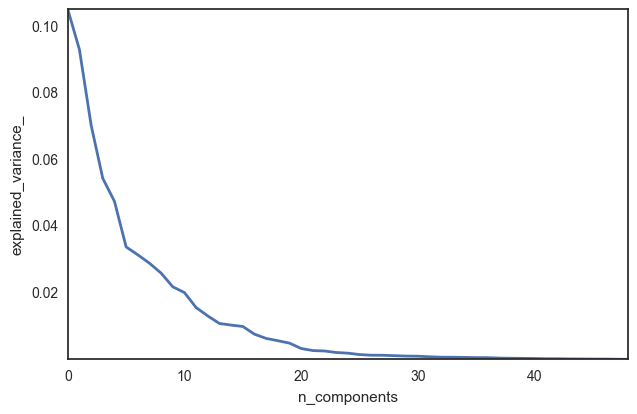

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)

plt.figure(1, figsize=(8, 5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

plt.show()

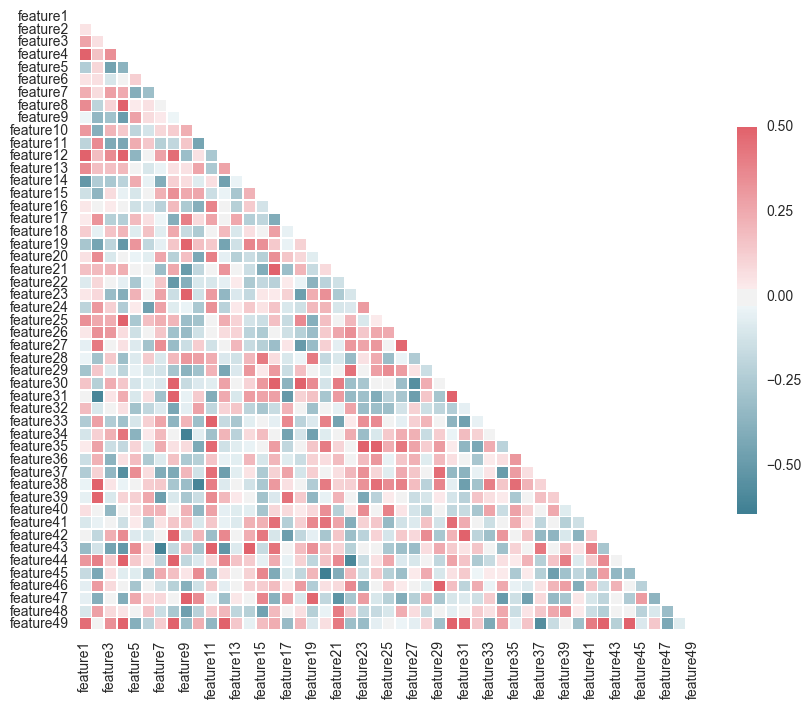

In [29]:
import numpy as np

# Correlation Matrix
sns.set(style="white")
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()